In [6]:
# Watch for any changes and reload it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%reload_ext autoreload

In [8]:
import os
import sys
sys.path.insert(0, '/data6/lekevin/hab-spc/')

import pandas as pd
import matplotlib.pyplot as plt

# Project level imports
from v_utils import plot_results, compute_imaged_volume, compute_accuracies, load_density_data

# Module level constants
MICRO_COLUMNS = 'micro_proro,micro_total-phyto'.split(',')
PRORO_COLUMNS = ['micro_proro', 'corrected_Prorocentrum',
                 'clsfier_Prorocentrum']
PHYTO_COLUMNS = 'spc_ImgCount,micro_total-phyto'.split(',')

# Preview of Density Data

In [9]:
# Initialize csv filename
data_dir = '/data6/lekevin/hab-spc/experiments/plot_estimates'
csv_fname = os.path.join(data_dir, 'Density-{}_data.csv')
df = load_density_data(csv_fname.format('all'), micro_col=MICRO_COLUMNS)
df.head(15)

,image_timestamp,micro_proro,micro_total-phyto,clsfier_proro_avg_1min,clsfier_proro_std_1min,clsfier_proro_avg_5min,clsfier_proro_std_5min,clsfier_proro_avg_15min,clsfier_proro_std_15min,clsfier_proro_avg_H,clsfier_proro_std_H,clsfier_proro_avg_1H30min,clsfier_proro_std_1H30min
0,2017-03-20,9.846,68.103,1.483607,1.432833,5.027778,3.996430,13.923077,8.507567,45.25,30.111252,60.333333,33.479679
1,2017-03-27,127.038,197.130,40.447514,9.261323,197.864865,43.854897,563.153846,125.912574,1830.25,808.548816,2440.333333,1406.182144
2,2017-04-03,145.186,372.352,14.670391,4.221224,70.972973,14.251575,202.000000,49.066674,656.50,238.475890,875.333333,422.537046
3,2017-04-10,165.212,451.831,50.888889,17.966292,247.567568,75.860662,704.615385,243.688811,2290.00,865.682101,3053.333333,1481.962963
4,2017-04-17,95.748,747.210,1.660377,1.381960,7.135135,3.905382,20.307692,9.218582,66.00,35.334119,88.000000,58.804762
5,2017-04-24,46.309,279.111,15.653631,5.121171,75.729730,18.584575,215.538462,59.631710,700.50,285.028507,934.000000,484.531389
6,2017-06-05,0.000,119.797,6.700000,2.900000,32.594595,8.145499,92.769231,22.354328,301.50,153.496743,402.000000,260.035895
7,2017-06-12,0.410,137.845,10.384181,3.782113,49.675676,12.150084,141.384615,36.693195,459.50,169.175205,612.666667,301.114965
8,2017-06-19,1.495,76.801,5.651685,2.361209,27.944444,5.109601,77.384615,21.402870,251.50,120.839770,335.333333,205.284085
9,2017-06-26,0.408,90.805,9.238889,2.961538,46.194444,7.709372,127.923077,30.927860,415.75,193.290423,554.333333,331.218290


In [13]:
xyfit

([9.846,
  127.038,
  145.186,
  165.212,
  95.748,
  46.309,
  0.0,
  0.41,
  1.495,
  0.408,
  4.381,
  0.0,
  0.272,
  0.0,
  0.626,
  6.253,
  1.087,
  0.0,
  1.286,
  0.816,
  0.408,
  0.816,
  1.903,
  0.0,
  0.136,
  0.544,
  2.462,
  0.68,
  1.231,
  0.626,
  1.252,
  0.626,
  0.272,
  0.408],
 [340.4975177360817,
  1668.766174640049,
  1874.4578565423394,
  2101.435023270092,
  1314.1214354554193,
  753.7736802445238,
  228.90173307606682,
  233.54872390590697,
  245.84624841902053,
  233.52605565795653,
  278.5565302115051,
  228.90173307606682,
  231.98461479732663,
  228.90173307606682,
  235.99689468455446,
  299.7740102931167,
  241.2219258371308,
  228.90173307606682,
  243.47741650819958,
  238.15037823984625,
  233.52605565795653,
  238.15037823984625,
  250.47057100091024,
  228.90173307606682,
  230.44317393669672,
  235.06749651858644,
  256.80634630305815,
  236.60893737921634,
  242.85403968956248,
  235.99689468455446,
  243.0920562930421,
  235.99689468455446,
 

========================= Time Distribution: 1min =========================
best fit line:
y = 3.86 + 0.19x
best fit line:
y = 4.33 + -0.02x


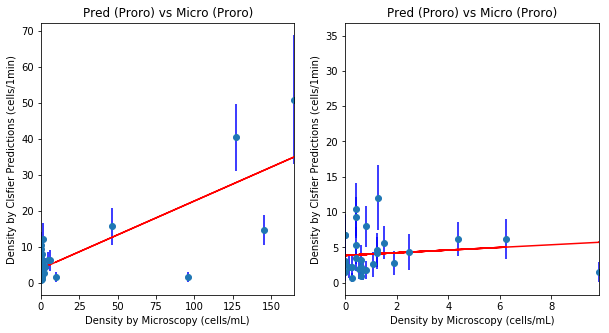

========================= Time Distribution: 5min =========================
best fit line:
y = 18.42 + 0.92x
best fit line:
y = 20.89 + -0.28x


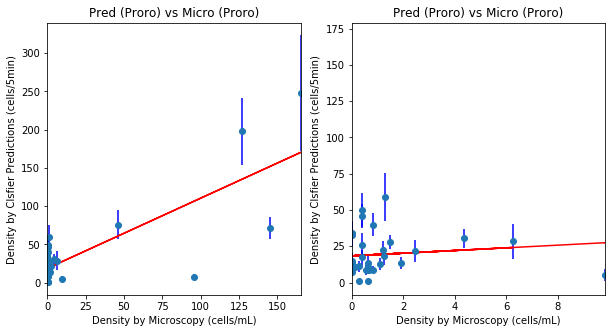

========================= Time Distribution: 15min =========================
best fit line:
y = 51.97 + 2.62x
best fit line:
y = 58.84 + -0.67x


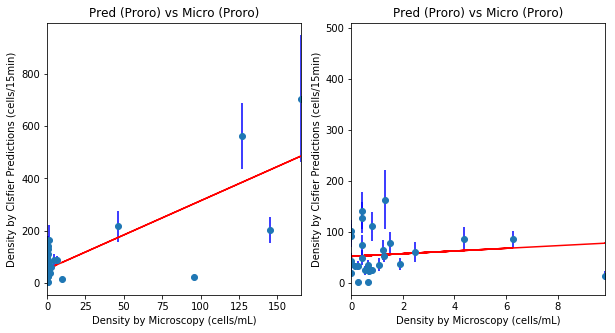

========================= Time Distribution: H =========================
best fit line:
y = 167.05 + 8.53x
best fit line:
y = 192.72 + -4.80x


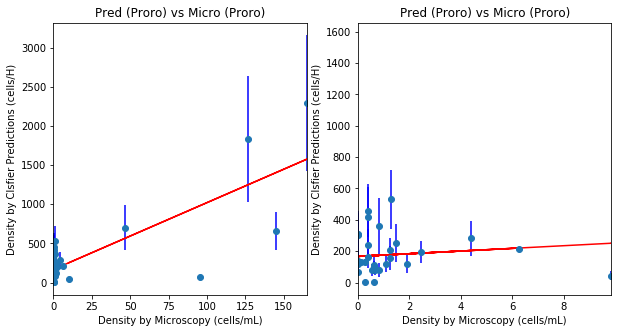

========================= Time Distribution: 1H30min =========================
best fit line:
y = 228.90 + 11.33x
best fit line:
y = 256.60 + -1.26x


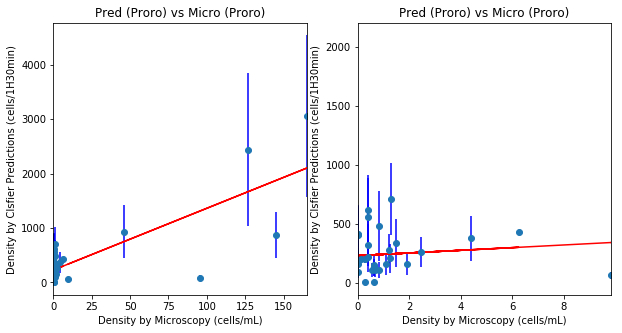

In [12]:
time_dist = ['1min', '5min', '15min', 'H', '1H30min']
for idx, t in enumerate(time_dist):
    print('=' * 25 + f' Time Distribution: {t} ' + '=' * 25)
    
    # Plot layout specifications
    n_rows, n_cols = 1, 2 
    plt_width, plt_height = 5, 5
    f, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*plt_width, n_rows*plt_height))
    ylabel_clf = ('Clsfier Predictions', t)
    ylabel_spc = ('SPC ROI counts', t)
    
    columns = [f'clsfier_proro_avg_{t}', f'clsfier_proro_std_{t}', 'micro_proro']
    proro_df, xyfit = plot_results(columns=columns, data=df, yerror=True,
                            ax=ax, idx=0, n_rows=n_rows, n_cols=n_cols,
                           ylabel=ylabel_clf, title='Pred (Proro) vs Micro (Proro)')
    
#     zoomed_df = df
    zoomed_df = df[df.micro_proro < 15]
    zoomed_in = plot_results(columns=columns, data=zoomed_df, yerror=True,
                            ax=ax, idx=1, n_rows=n_rows, n_cols=n_cols, xyfit=xyfit,
                           ylabel=ylabel_clf, title='Pred (Proro) vs Micro (Proro)')
    plt.show()

# Plot Correlation Results

To run correlation plot generation using this jupyter notebook, the code block expects a `Density-{<TIME>}_data.csv` to be pre-generated. You can generate one using the script `prepare_db/create_csv.py`. The code block reads data from the csv files and uses `plot_results()` to generate p

========================= Time Distribution: 1m =========================
best fit line:
y = -0.34 + 0.14x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 0.11 + 0.01x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -6.29 + 0.12x
best fit line:
y = 5.28 + 0.69x


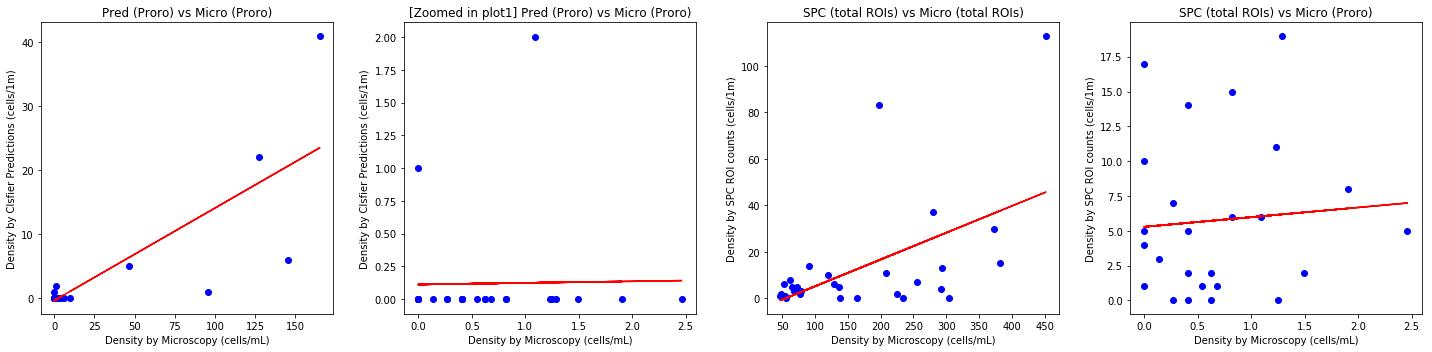

========================= Time Distribution: 5m =========================
best fit line:
y = -1.06 + 0.65x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 0.57 + 0.68x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -11.91 + 0.50x
best fit line:
y = 40.02 + 1.77x


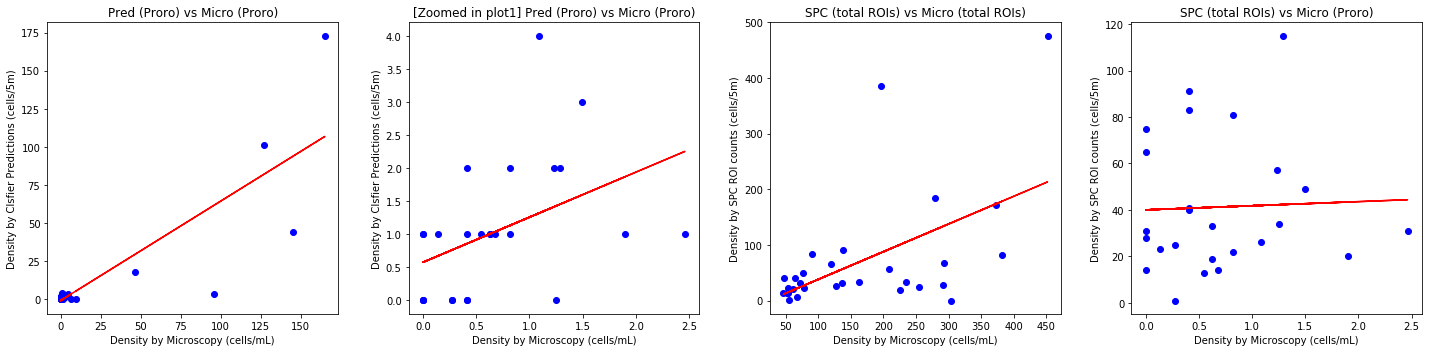

========================= Time Distribution: 7m30s =========================
best fit line:
y = -0.73 + 0.86x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 0.92 + 1.04x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -7.84 + 0.67x
best fit line:
y = 60.84 + 2.50x


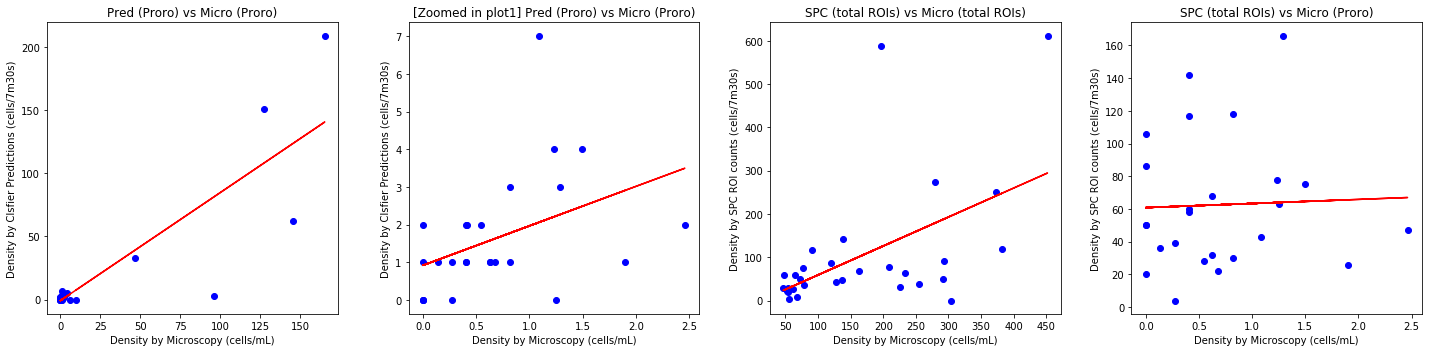

========================= Time Distribution: 10m =========================
best fit line:
y = -0.73 + 1.19x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 1.34 + 1.54x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -8.04 + 0.88x
best fit line:
y = 82.28 + 2.92x


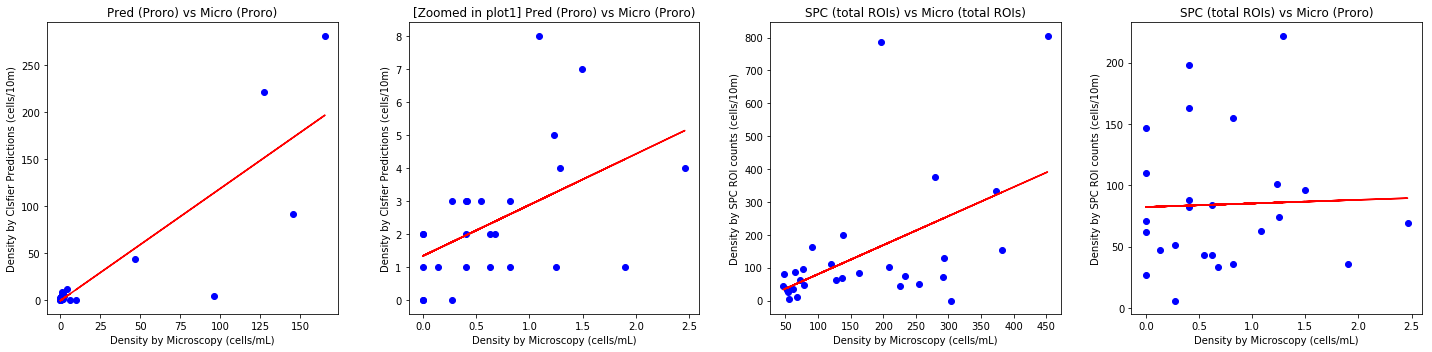

========================= Time Distribution: 15m =========================
best fit line:
y = -0.80 + 1.71x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 2.10 + 2.01x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = 3.26 + 1.21x
best fit line:
y = 125.92 + 4.20x


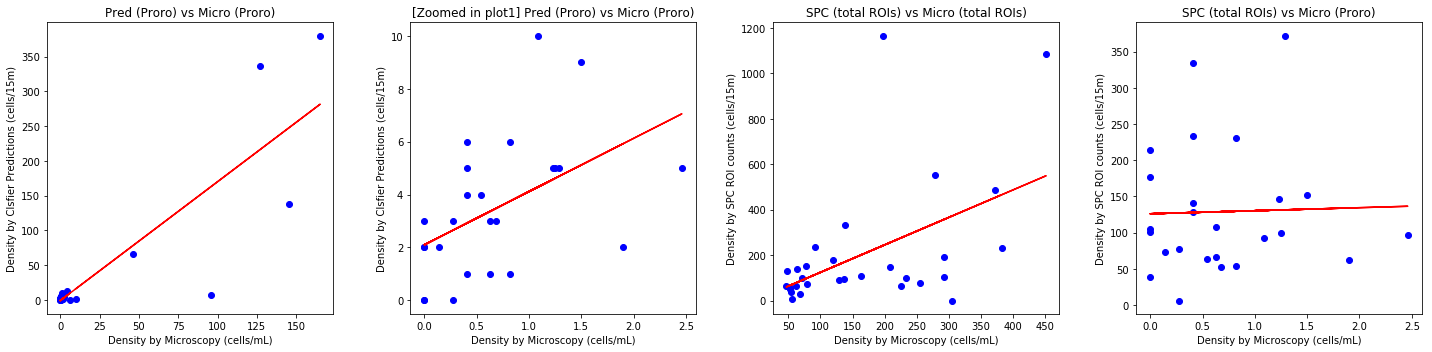

========================= Time Distribution: 30m =========================
best fit line:
y = -4.06 + 3.87x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 3.75 + 4.86x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -52.54 + 2.90x
best fit line:
y = 252.01 + 23.85x


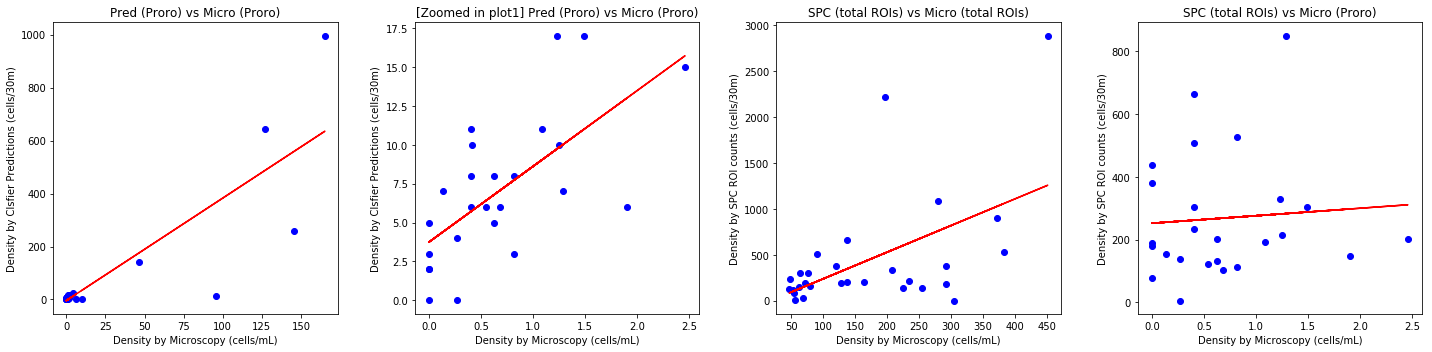

========================= Time Distribution: 1h =========================
best fit line:
y = -6.08 + 7.11x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 9.94 + 5.16x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -101.10 + 5.78x
best fit line:
y = 497.90 + 45.01x


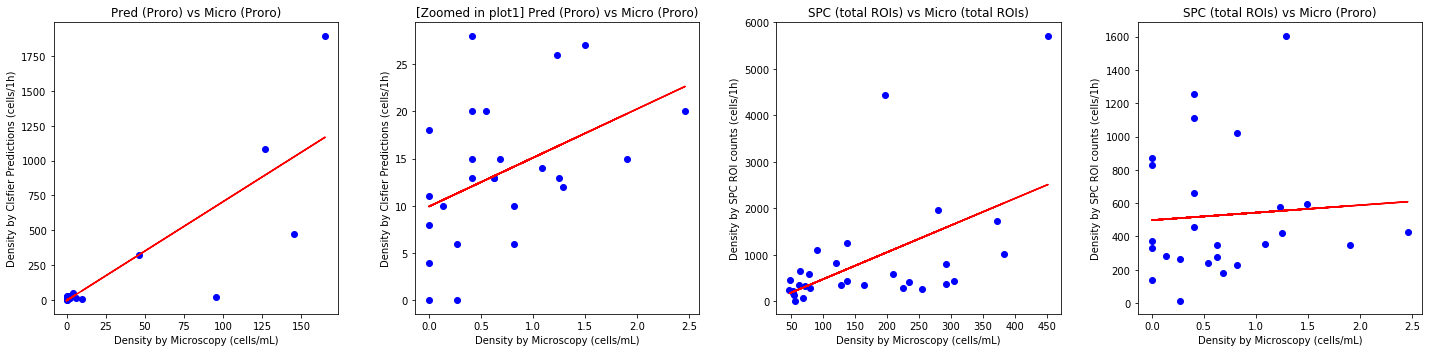

========================= Time Distribution: 2h =========================
best fit line:
y = -16.93 + 16.36x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 21.90 + 8.49x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -320.14 + 12.67x
best fit line:
y = 995.95 + 79.84x


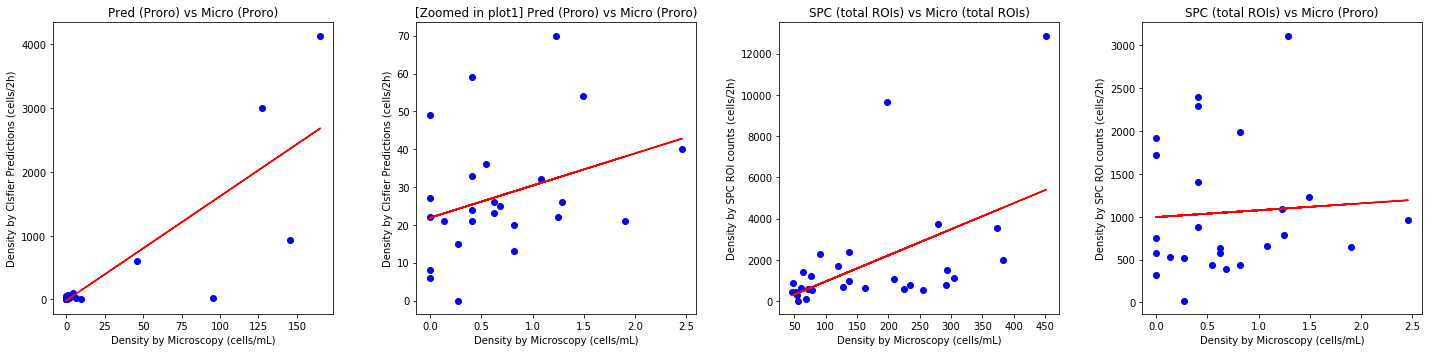

========================= Time Distribution: 2017 =========================
best fit line:
y = -26.25 + 24.76x
Outliers cleaned up (micro_estimates >= 4 cells/mL dropped)
best fit line:
y = 31.66 + 15.62x
Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)
best fit line:
y = -506.87 + 19.16x
best fit line:
y = 1448.82 + 144.10x


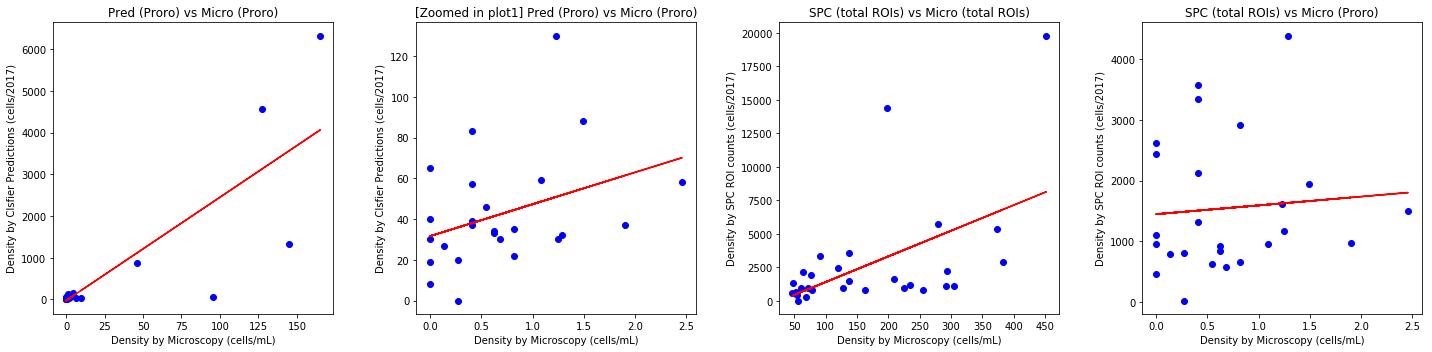

In [9]:
# Produce plots for each time distribution
time_dist = ['1m', '5m', '7m30s', '10m', '15m', '30m', '1h', '2h', '2017']
for t in time_dist:
    print('=' * 25 + f' Time Distribution: {t} ' + '=' * 25)
    
    # Plot layout specifications
    n_rows, n_cols = 1, 4
    plt_width, plt_height = 5, 5
    f, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*plt_width, n_rows*plt_height))
    ylabel_clf = ('Clsfier Predictions', t)
    ylabel_spc = ('SPC ROI counts', t)
    
    # Load data
    df = load_density_data(csv_fname.format(t))
    avbl_proro_col = sorted(list(set(df.columns).intersection(PRORO_COLUMNS)))
    
    # ======================== Begin: Generate Plots ======================== #
    # Raw plot of CLF vs Micro (Prorocentrum)
    proro_df = plot_results(avbl_proro_col, df, ax=ax, idx=0, n_cols=n_cols, n_rows=n_rows,
                            ylabel=ylabel_clf, title='Pred (Proro) vs Micro (Proro)')
    
    outliers = 4
    print('Outliers cleaned up (micro_estimates >= {} cells/mL dropped)'.format(outliers))
    cleaned_df = df[df.micro_proro < outliers]
#     cleaned_df = df

    # Zoomed in CLF vs Micro (Prorocentrum)
    proro_df = plot_results(avbl_proro_col, cleaned_df, ax=ax, idx=1, n_rows=n_rows,
                            n_cols=n_cols, ylabel=ylabel_clf, title='[Zoomed in plot1] Pred (Proro) vs Micro (Proro)')
    
    # Zoomed in SPC vs Micro (Phytoplankton)
    cleaned_roi = df[df['micro_total-phyto'] < 600]
    print('Outliers cleaned up (micro_estimates >= 600 cells/mL dropped)')
    phyto_df = plot_results(PHYTO_COLUMNS, cleaned_roi, ax=ax, idx=2, n_rows=n_rows,
                            n_cols=n_cols, ylabel=ylabel_spc, title='SPC (total ROIs) vs Micro (total ROIs)')
    
    # Zoomed in SPC (total phytoplankton) vs Micro (Prorocentrum)
    custom_col = ['spc_ImgCount', 'micro_proro']
    phyto_micro_df = plot_results(custom_col, cleaned_df, ax=ax, idx=3, n_rows=n_rows,
                                  n_cols=n_cols, ylabel=ylabel_spc, title='SPC (total ROIs) vs Micro (Proro)')
    plt.tight_layout()
    plt.show()
#     print(proro_df.reset_index(drop=True))
    # ======================== End: Generate Plots ======================== #



Plotting results
==============================Prorocentrum==============================
best fit line:
y = -35.60 + 6.94x
==============================Corrected Prorocentrum==============================
best fit line:
y = -37.72 + 6.37x
[XAXIS 9.846 | DATE 2017-03-20] TRUE POS: 0.846 | FALSE POS: 0.154 || TRUE NEG: 1.000 | FALSE NEG: 0.000
[XAXIS 127.038 | DATE 2017-03-27] TRUE POS: 0.921 | FALSE POS: 0.079 || TRUE NEG: 0.989 | FALSE NEG: 0.011
[XAXIS 165.212 | DATE 2017-04-10] TRUE POS: 0.920 | FALSE POS: 0.080 || TRUE NEG: 1.000 | FALSE NEG: 0.000
Time range: 13:00:00 - 13:30:00


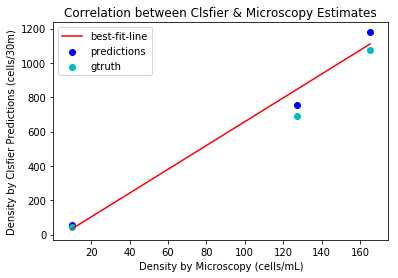

In [10]:
df = load_density_data(csv_fname.format('30m-gtruth'))
# Plot results
print()
print('Plotting results')
print('='*30 + 'Prorocentrum' + '='*30)
proro_df = plot_results(sorted(PRORO_COLUMNS), df)
print('='*30 + 'Corrected Prorocentrum' + '='*30)
proro_df = plot_results(sorted(PRORO_COLUMNS), df, corrected=True,
                        color='c', best_fit_line=False,
                        ylabel='30m',
                        title='Predictions/Gtruth (Proro) vs Micro (Proro)')
plt.legend(labels=('best-fit-line', 'predictions', 'gtruth'))
compute_accuracies(df)
print('Time range: 13:00:00 - 13:30:00')